<a href="https://colab.research.google.com/github/Mcdimmy007/CIDM-5360/blob/main/Clothing_Identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *



In [ ]:
ims = search_images_ddg('clothing images')
len(ims)

200

In [ ]:
ims[0:10]


(#10) ['https://images.abeautifulmess.com/uploads/2018/07/Best-Kids-Clothes-on-Amazon-click-through-for-links.jpg','https://images.unsplash.com/photo-1512436991641-6745cdb1723f?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80','http://1.bp.blogspot.com/-B0wUS-ppCD0/TltwzTXSlII/AAAAAAAAJMY/Xtc5uSHl_wo/s1600/Pakistani-Designer-Clothes-5.jpg','https://wallpaperaccess.com/full/2489862.jpg','https://image.shutterstock.com/image-photo/fashion-stylish-luxury-clothes-display-260nw-1360347566.jpg','https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_1440,f_auto/MA_00194591_gjtbgj.jpg','https://ww1.prweb.com/prfiles/2009/05/19/276359/Seoulhighres.jpg','https://i1.wp.com/the-arrow.com/wp-content/uploads/2020/07/Affordable-Clothing-Websites.png?fit=1000%2C1500&ssl=1','http://static4.depositphotos.com/1000647/282/i/450/depositphotos_2820640-stock-photo-ladys-clothing.jpg','https://cliparting.com/wp-content/uploads/2017/01/Clothing-clothes-clip-art-free-clipart-images-3-clipartix-2.jpg']

In [ ]:
dest = 'sample_data/shirt.jpg'
download_url(ims[0], dest, show_progress=False)

Path('sample_data/shirt.jpg')

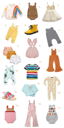

In [ ]:
im= Image.open(dest)
im.to_thumb(128,128)

In [ ]:
clothing_types ='shirt', 'pants', 'shorts', 'blouse', 'dress'
path = Path('clothing')

In [ ]:
if not path.exists():
  path.mkdir()
for o in clothing_types:
    dest= (path/o)
    dest.mkdir(exist_ok= True)
    results= search_images_ddg(f'{o} clothing')
    download_images(dest, urls=results)

In [ ]:
fns= get_image_files(path)
fns

(#949) [Path('clothing/pants/818be235-cc76-4565-ba32-1a707f34a4f7.jpg'),Path('clothing/pants/4c213dc7-6a75-43bd-84c2-f1bc9442eaad.jpg'),Path('clothing/pants/91a425ae-a058-4721-99d8-2681d380dc88.jpg'),Path('clothing/pants/347d71b8-34b0-4632-af1b-0f75ef8dce3f.jpg'),Path('clothing/pants/9968693c-42e1-4f46-9b64-84a83b1f604c.jpg'),Path('clothing/pants/4e7ff870-cbcc-4089-8979-56432cc0f008.jpg'),Path('clothing/pants/1fe4ea15-7076-4d25-96df-74654f98c2ae.jpg'),Path('clothing/pants/0d830442-8e91-4d2a-8059-e6a73bb82f6a.jpg'),Path('clothing/pants/4cdb4042-158c-49b9-a11d-055522623a62.jpg'),Path('clothing/pants/72620faf-6b13-4bf0-8959-5c219a79dd44.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#19) [Path('clothing/pants/0b2aeff6-6005-427d-8246-72869f207234.jpg'),Path('clothing/pants/d29cc922-690c-4d8c-816d-664b34a26080.jpg'),Path('clothing/pants/80a85259-b4b9-456f-acd2-bbe24074fb92.jpg'),Path('clothing/pants/09f4c04f-bc45-4f34-b524-26d1233f2c3d.jpg'),Path('clothing/shirt/7f8932d8-e17c-4de0-94dc-45cf50391a45.jpg'),Path('clothing/shirt/aa8a4bc5-a2c0-48cf-b5b5-fedb3348ffb3.jpg'),Path('clothing/shirt/55b9fe52-6539-4738-99b7-c4d3fa5bf599.jpg'),Path('clothing/shorts/219bebe4-80a7-4c5c-b16e-4fe8243a924b.jpg'),Path('clothing/shorts/0496d53c-3697-430b-b310-b177c799ac6e.jpg'),Path('clothing/shorts/a6f3b795-07cb-425c-9073-81b5829535c8.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#19) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
??verify_images

In [ ]:
?verify_images

In [ ]:
!pip install nbdev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 8.5 MB/s eta 0:00:00


In [ ]:
doc(verify_images)

In [ ]:
clothing = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [ ]:
dls= clothing.dataloaders(path)

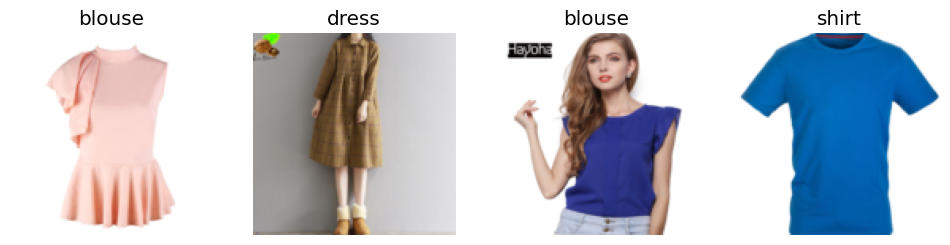

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
clothing = clothing.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = clothing.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 121MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.171593,1.006257,0.295699,03:21


epoch,train_loss,valid_loss,error_rate,time
0,1.368046,0.743898,0.236559,04:07
1,1.088368,0.660766,0.193548,04:10
2,0.917741,0.659524,0.209677,04:09
3,0.823283,0.664419,0.193548,04:07


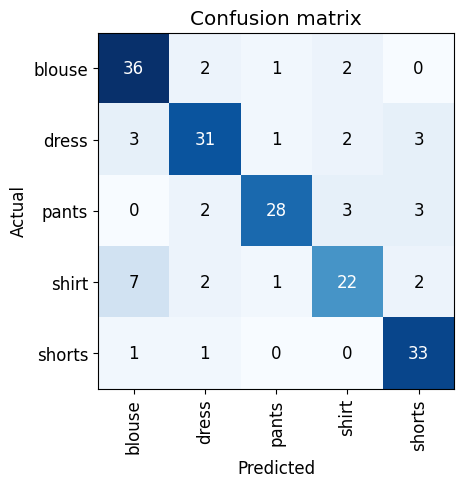

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

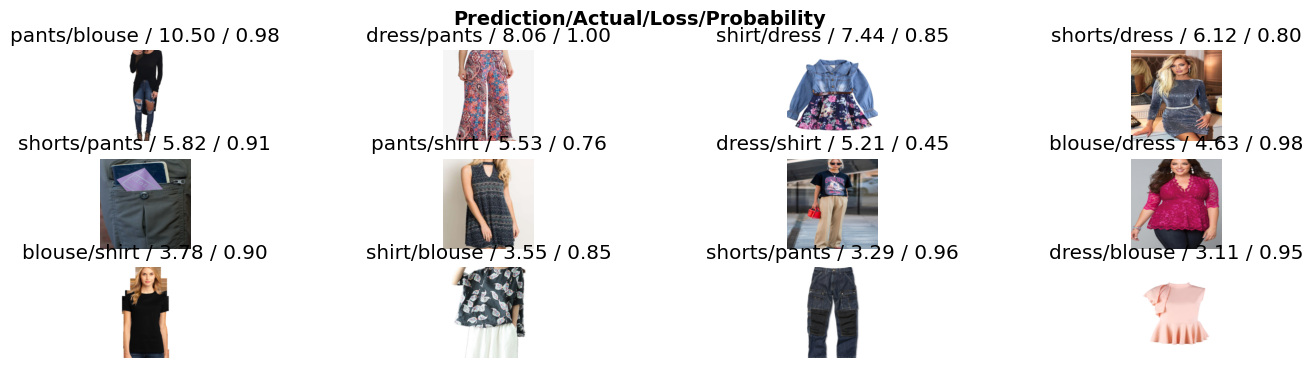

In [ ]:
interp.plot_top_losses(12, nrows=3 , figsize=(17,4))

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
from google.colab import runtime
runtime.unassign

<function google.colab.runtime.unassign()>